# Why can the instantaneous frequency of a band-pass filtered chirp recording go down ...
... if a chirp is an up-modulation of the frequency? 

This is the question we try to answer in this notebook

In [14]:
import matplotlib.pyplot as plt
import numpy as np
import thunderfish.fakefish as ff 
from filters import instantaneous_frequency, bandpass_filter
%matplotlib qt

# parameters that stay the same
samplerate = 20000
duration = 0.2
chirp_freq = 5
smooth = 3

ImportError: Failed to import any of the following Qt binding modules: PyQt6, PySide6, PyQt5, PySide2

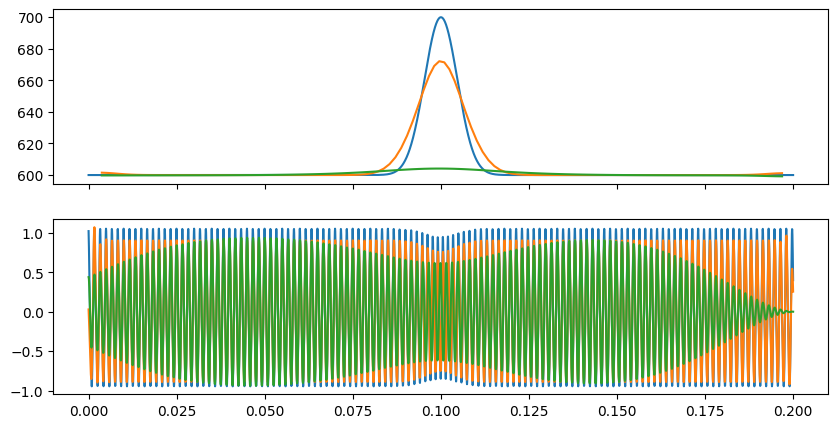

In [7]:
def make_chirp(eodf, size, width, kurtosis, contrast, phase0):

    chirp_trace, amp = ff.chirps(
        eodf = eodf,
        samplerate = samplerate,
        duration = duration,
        chirp_freq = chirp_freq,
        chirp_size = size,
        chirp_width = width,
        chirp_kurtosis = kurtosis,
        chirp_contrast = contrast,
    )

    chirp = ff.wavefish_eods(
        fish = 'Alepto',
        frequency = chirp_trace,
        samplerate = samplerate,
        duration = duration,
        phase0 = phase0,
        noise_std = 0,
    )

    chirp *= amp

    return chirp_trace, chirp

def filtered_chirp(eodf, size, width, kurtosis, contrast, phase0):

    time = np.arange(0, duration, 1/samplerate)
    chirp_trace, chirp = make_chirp(
        eodf = eodf, 
        size = size, 
        width = width, 
        kurtosis = kurtosis, 
        contrast = contrast, 
        phase0 = phase0,
    )

    # apply filters
    narrow_filtered = bandpass_filter(chirp, samplerate, eodf-10, eodf+10)
    narrow_freqtime, narrow_freq = instantaneous_frequency(narrow_filtered, samplerate, smooth)
    broad_filtered = bandpass_filter(chirp, samplerate, eodf-300, eodf+300)
    broad_freqtime, broad_freq = instantaneous_frequency(broad_filtered, samplerate, smooth)

    original = (time, chirp_trace, chirp)
    broad = (broad_freqtime, broad_freq, broad_filtered)
    narrow = (narrow_freqtime, narrow_freq, narrow_filtered)

    return original, broad, narrow

def plot(original, broad, narrow, axs):

    axs[0].plot(original[0], original[1], label='chirp trace')
    axs[0].plot(broad[0], broad[1], label='broad filtered')
    axs[0].plot(narrow[0], narrow[1], label='narrow filtered')
    axs[1].plot(original[0], original[2], label='unfiltered')
    axs[1].plot(original[0], broad[2], label='broad filtered')
    axs[1].plot(original[0], narrow[2], label='narrow filtered')

original, broad, narrow = filtered_chirp(600, 100, 0.02, 1, 0.1, 0)
fig, axs = plt.subplots(2, 1, figsize=(10, 5), sharex=True)
plot(original, broad, narrow, axs)
fig.align_labels()
plt.show()

## Chirp size
now that we have established an easy way to simulate and plot the chirps, lets change the chirp size and see how the narrow-filtered instantaneous frequency changes.

size 10 Hz; Integral 0.117
size 30 Hz; Integral 0.35
size 50 Hz; Integral 0.584
size 70 Hz; Integral 0.818
size 90 Hz; Integral 1.051
size 110 Hz; Integral 1.285
size 130 Hz; Integral 1.518
size 150 Hz; Integral 1.752
size 170 Hz; Integral 1.986
size 190 Hz; Integral 2.219


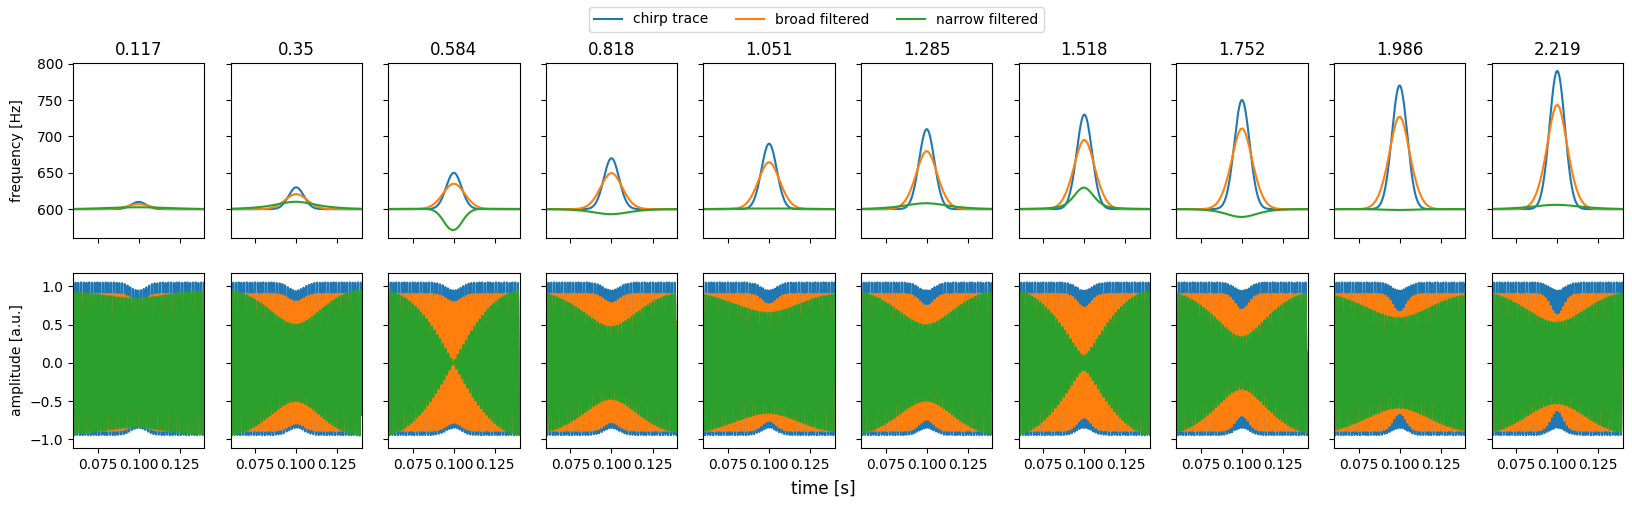

In [17]:
sizes = np.arange(10, 600, 20)[:10]
fig, axs = plt.subplots(2, len(sizes), figsize=(20, 5), sharex=True, sharey='row')
integrals = []

for i, size in enumerate(sizes):
    original, broad, narrow = filtered_chirp(600, size, 0.02, 1, 0.1, 0)

    integral = np.sum(original[1]-600)/(20000)
    integrals.append(integral)

    plot(original, broad, narrow, axs[:, i])
    axs[:, i][0].set_xlim(0.06, 0.14)
    axs[0, i].set_title(np.round(integral, 3))
    print(f'size {size} Hz; Integral {np.round(integral,3)}')
 
fig.legend(handles=axs[0,0].get_lines(), loc='upper center', ncol=3)
axs[0,0].set_ylabel('frequency [Hz]')
axs[1,0].set_ylabel('amplitude [a.u.]')
fig.supxlabel('time [s]')
fig.align_labels()
plt.show()

## Chirp width

width 0.02 s; Integral 1.168
width 0.025 s; Integral 1.46
width 0.030000000000000002 s; Integral 1.752
width 0.035 s; Integral 2.044
width 0.04000000000000001 s; Integral 2.336
width 0.045000000000000005 s; Integral 2.628
width 0.05 s; Integral 2.92
width 0.05500000000000001 s; Integral 3.212
width 0.06000000000000001 s; Integral 3.504
width 0.06500000000000002 s; Integral 3.796


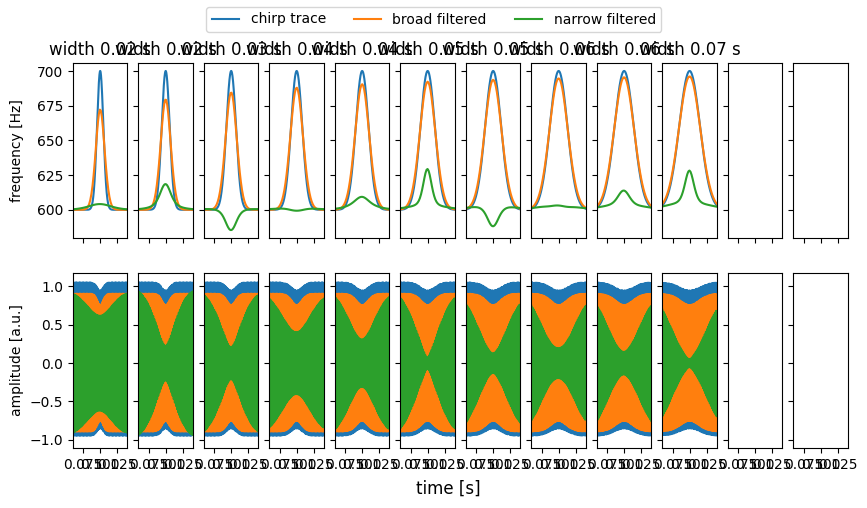

In [9]:
widths = np.arange(0.02, 0.08, 0.005)
fig, axs = plt.subplots(2, len(widths), figsize=(10, 5), sharex=True, sharey='row')
integrals = []

for i, width in enumerate(widths):
    if i > 9:
        break

    original, broad, narrow = filtered_chirp(600, 100, width, 1, 0.1, 0)

    integral = np.sum(original[1]-600)/(20000)

    plot(original, broad, narrow, axs[:, i])
    axs[:, i][0].set_xlim(0.06, 0.14)
    axs[0, i].set_title(f'width {np.round(width, 2)} s')
    print(f'width {width} s; Integral {np.round(integral, 3)}')
 
fig.legend(handles=axs[0,0].get_lines(), loc='upper center', ncol=3)
axs[0,0].set_ylabel('frequency [Hz]')
axs[1,0].set_ylabel('amplitude [a.u.]')
fig.supxlabel('time [s]')
fig.align_labels()
plt.show()

## Chirp kurtosis

/opt/homebrew/lib/python3.11/site-packages/thunderfish/fakefish.py:373: RuntimeWarning: divide by zero encountered in scalar divide
  chirp_sig = 0.5*chirp_width / (2.0*np.log(10.0))**(0.5/chirp_kurtosis)
/opt/homebrew/lib/python3.11/site-packages/thunderfish/fakefish.py:374: RuntimeWarning: divide by zero encountered in divide
  gauss = np.exp(-0.5*((chirp_t/chirp_sig)**2.0)**chirp_kurtosis)


kurt 0.0; Integral 4.852
kurt 1.6; Integral 1.38
kurt 3.2; Integral 1.634
kurt 4.800000000000001; Integral 1.741
kurt 6.4; Integral 1.8
kurt 8.0; Integral 1.837
kurt 9.600000000000001; Integral 1.862
kurt 11.200000000000001; Integral 1.881
kurt 12.8; Integral 1.895
kurt 14.4; Integral 1.906
kurt 16.0; Integral 1.915
kurt 17.6; Integral 1.923
kurt 19.200000000000003; Integral 1.929


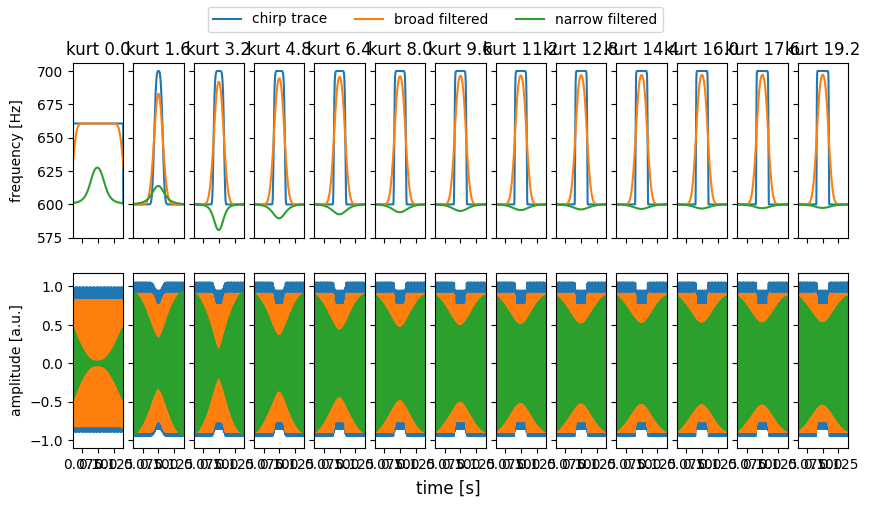

In [10]:
kurtosiss = np.arange(0, 20, 1.6)
fig, axs = plt.subplots(2, len(kurtosiss), figsize=(10, 5), sharex=True, sharey='row')
integrals = []

for i, kurtosis in enumerate(kurtosiss):

    original, broad, narrow = filtered_chirp(600, 100, 0.02, kurtosis, 0.1, 0)

    integral = np.sum(original[1]-600)/(20000)

    plot(original, broad, narrow, axs[:, i])
    axs[:, i][0].set_xlim(0.06, 0.14)
    axs[0, i].set_title(f'kurt {np.round(kurtosis, 2)}')
    print(f'kurt {kurtosis}; Integral {np.round(integral, 3)}')
 
fig.legend(handles=axs[0,0].get_lines(), loc='upper center', ncol=3)
axs[0,0].set_ylabel('frequency [Hz]')
axs[1,0].set_ylabel('amplitude [a.u.]')
fig.supxlabel('time [s]')
fig.align_labels()
plt.show()

## Chirp contrast

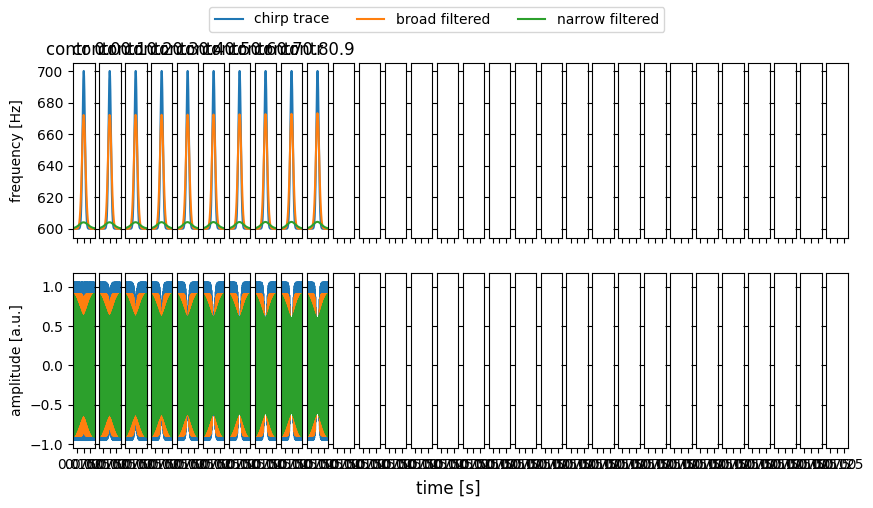

In [11]:
contrasts = np.arange(0.0, 1.1, 0.1)
fig, axs = plt.subplots(2, len(sizes), figsize=(10, 5), sharex=True, sharey='row')
integrals = []

for i, contrast in enumerate(contrasts):
    if i > 9:
        break
    original, broad, narrow = filtered_chirp(600, 100, 0.02, 1, contrast, 0)

    integral = np.trapz(original[2], original[0])
    integrals.append(integral)

    plot(original, broad, narrow, axs[:, i])
    axs[:, i][0].set_xlim(0.06, 0.14)
    axs[0, i].set_title(f'contr {np.round(contrast, 2)}')
 
fig.legend(handles=axs[0,0].get_lines(), loc='upper center', ncol=3)
axs[0,0].set_ylabel('frequency [Hz]')
axs[1,0].set_ylabel('amplitude [a.u.]')
fig.supxlabel('time [s]')
fig.align_labels()
plt.show()

## Chirp phase 

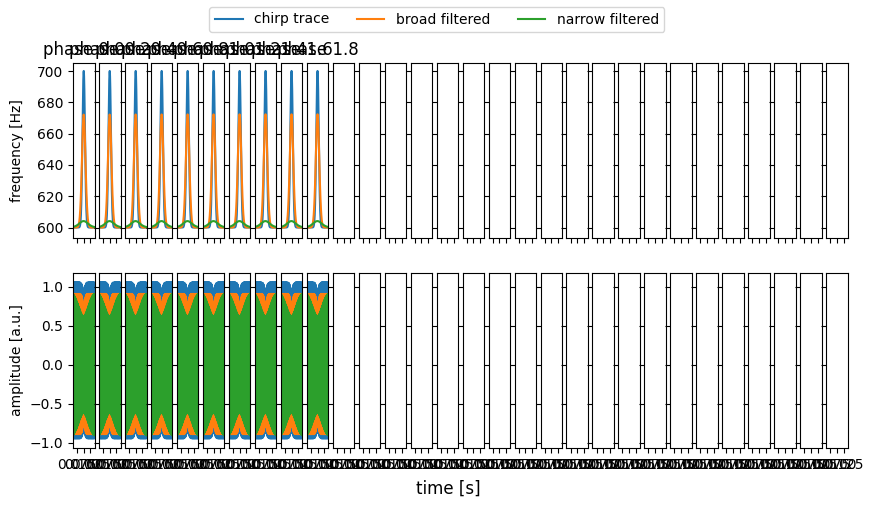

In [12]:
phases = np.arange(0.0, 2 * np.pi, 0.2)
fig, axs = plt.subplots(2, len(sizes), figsize=(10, 5), sharex=True, sharey='row')
integrals = []
for i, phase in enumerate(phases):
    if i > 9:
        break

    original, broad, narrow = filtered_chirp(600, 100, 0.02, 1, 0.1, phase)

    integral = np.trapz(original[2], original[0])
    integrals.append(integral)

    plot(original, broad, narrow, axs[:, i])
    axs[:, i][0].set_xlim(0.06, 0.14)
    axs[0, i].set_title(f'phase {np.round(phase, 2)}')

 
fig.legend(handles=axs[0,0].get_lines(), loc='upper center', ncol=3)
axs[0,0].set_ylabel('frequency [Hz]')
axs[1,0].set_ylabel('amplitude [a.u.]')
fig.supxlabel('time [s]')
fig.align_labels()
plt.show()

These experiments show, that the narrow filtered instantaneous freuqency only switches its sign, when the integral of the instantaneous frequency (that was used to make the signal)
changes. Specifically, when the instantaneous frequency is 0.57, 1.57, 2.57 etc., the sign swithes. 